# Project 01 - Color Compression

## Thông tin sinh viên

- Họ và tên:
- MSSV:
- Lớp:

## Import các thư viện liên quan

In [8]:
import matplotlib.pyplot as plt
import PIL
import numpy as np

## Helper functions

In [29]:
import PIL.Image
import PIL.ImageGrab


def read_img(img_path):
    '''
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
        Image (2D)
    '''

    # YOUR CODE HERE
    return PIL.Image.open(img_path)

def show_img(img_2d):
    '''
    Show image

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)
    '''

    # YOUR CODE HERE
    # display(img_2d)
    plt.imshow(img_2d)
    # plt.axis('off')  # Hide axes
    plt.show()

def save_img(img_2d, img_path):
    '''
    Save image to img_path

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)
    img_path : str
        Path of image
    '''
    
    # YOUR CODE HERE
    # Extract the file extension and determine the format
    ext = img_path.split('.')[-1].lower()
    if ext in ['png', 'pdf']:
        img_2d.save(img_path, format=ext.upper())
    else:
        print("Unsupported file format. Please use either 'png' or 'pdf'.")

def convert_img_to_1d(img_2d):
    '''
    Convert 2D image to 1D image

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)

    Returns
    -------
        Image (1D)
    '''
    
    # YOUR CODE HERE
    A = np.asarray(img_2d)
    X = A.reshape(A.shape[0] * A.shape[1], A.shape[2])
    return X

def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
    '''
    K-Means algorithm

    Parameters
    ----------
    img_1d : np.ndarray with shape=(height * width, num_channels)
        Original (1D) image
    k_clusters : int
        Number of clusters
    max_iter : int
        Max iterator
    init_centroids : str, default='random'
        The method used to initialize the centroids for K-means clustering
        'random' --> Centroids are initialized with random values between 0 and 255 for each channel
        'in_pixels' --> A random pixel from the original image is selected as a centroid for each cluster

    Returns
    -------
    centroids : np.ndarray with shape=(k_clusters, num_channels)
        Stores the color centroids for each cluster
    labels : np.ndarray with shape=(height * width, )
        Stores the cluster label for each pixel in the image
    '''

    # YOUR CODE HERE
    print('Init centroids')
    centroids = []
    if (init_centroids == 'in_pixels'):
        random_indices = np.random.choice(img_1d.shape[0], k_clusters, replace=False)
        centroids = img_1d[random_indices]
    else:
        centroids = np.random.uniform(np.min(img_1d, axis=0), np.max(img_1d, axis=0), size=(k_clusters, img_1d.shape[1]))

    # pixel/cluster are the same, just data point
    for time in range(max_iter):
        # idex of y is pixel
        # value of y[idx] is marked centroid
        print("Loop: ", time)
        # For each pixels, find the nearest centroids (using euclidean distance) to that pixel and label it
        distances = np.sqrt(np.sum((centroids[:, np.newaxis] - img_1d)**2, axis=2))
        labels = np.argmin(distances, axis=0)

        # list of which cluster marked with which centroids
        # c0: clster1, clster 2, ...
        # ck: ...
        cluster_indices = []

        for i in range(k_clusters):
            cluster_indices.append(np.argwhere(labels == i))

        # reposition centroids
        cluster_center = []

        flag = True

        for i, indices in enumerate(cluster_indices):
            # a centroid with no one marked
            if len(indices) == 0:
                flag = False
                # cluster_center.append(centroids[i])
                cluster_center.append(np.random.uniform(np.min(img_1d, axis=0), np.max(img_1d, axis=0), size=(1, img_1d.shape[1]))[0])
            else:
                cluster_center.append(np.mean(img_1d[indices], axis=0)[0])

        if np.max(centroids - np.array(cluster_center)) < 0.0001 and flag: # no changes
            break
        else:
            centroids = np.array(cluster_center)

    return  centroids, labels

def generate_2d_img(img_2d_shape, centroids, labels):
    '''
    Generate a 2D image based on K-means cluster centroids

    Parameters
    ----------
    img_2d_shape : tuple (height, width, 3)
        Shape of image
    centroids : np.ndarray with shape=(k_clusters, num_channels)
        Store color centroids
    labels : np.ndarray with shape=(height * width, )
        Store label for pixels (cluster's index on which the pixel belongs)

    Returns
    -------
        New image (2D)
    '''

    # YOUR CODE HERE
    print("Generating...")
    compressed_img_1d = np.zeros((img_2d_shape[0] * img_2d_shape[1], img_2d_shape[2]), dtype=np.uint8) # round up centroids RBG values

    for i, label in enumerate(labels):
        compressed_img_1d[i] = centroids[label]

    compressed_img_2d = compressed_img_1d.reshape(img_2d_shape)

    return PIL.Image.fromarray(compressed_img_2d)


# Your additional functions here
def input_kmeans():
    k_clusters = int(input("Enter the number of color clusters (e.g., 16): "))
    max_iter = int(input("Enter the maximum number of iterations for K-means (e.g., 100): "))
    init_centroids = input("Enter how to initialize centroids (random or in_pixels): ")

    return k_clusters, max_iter, init_centroids

## Your tests

Each of the following testcases has 2 images
Testcase 1: Large images
Testcase 2: Small images
Testcase 3: Images with small amount of color
Testcase 4: Vibrant images
Testcase 2: Small images
Compressing...
Init centroids
Loop:  0
Loop:  1
Loop:  2
Loop:  3
Loop:  4
Loop:  5
Loop:  6
Loop:  7
Loop:  8
Loop:  9
Loop:  10
Loop:  11
Loop:  12
Loop:  13
Loop:  14
Loop:  15
Loop:  16
Loop:  17
Loop:  18
Loop:  19
Generating...
Result:


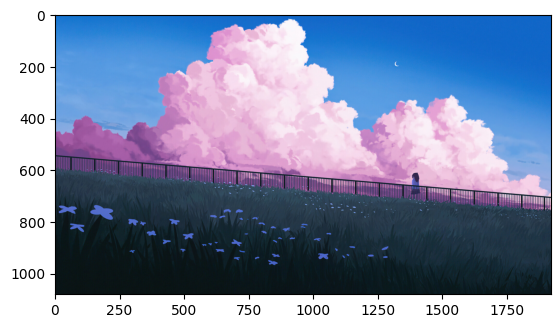

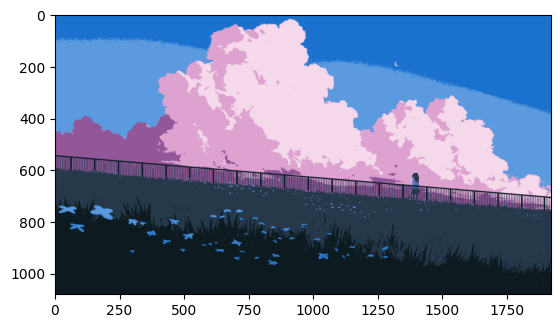

Compressing...
Init centroids
Loop:  0
Loop:  1
Loop:  2
Loop:  3
Loop:  4
Loop:  5
Loop:  6
Loop:  7
Loop:  8
Loop:  9
Loop:  10
Loop:  11
Loop:  12
Loop:  13
Generating...
Result:


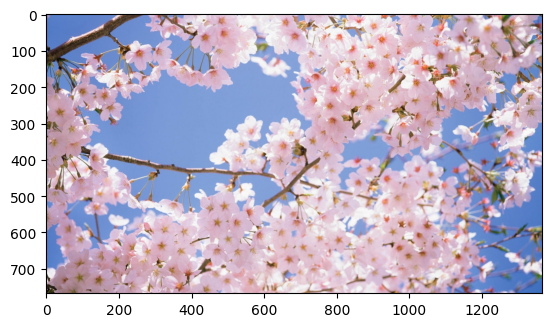

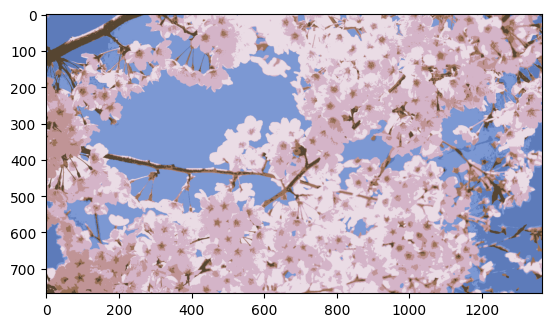

In [32]:
# YOUR CODE HERE
# Testcase 1: Image with big size
def test7(k_clusters, max_iter, init_centroids):
    testPath = 'Picture/Test/test7.jpg'
    testImg = read_img(testPath)
    img_2d = np.asarray(testImg)

    img_1d = convert_img_to_1d(testImg)
    print("Compressing...")

    centroids, labels = kmeans(img_1d, k_clusters, max_iter, init_centroids)

    compressedImg = generate_2d_img(img_2d.shape, centroids, labels)

    save_img(compressedImg, 'Picture/Compressed/test7.png')

    print("Result:")
    show_img(testImg)
    show_img(compressedImg)

def test8(k_clusters, max_iter, init_centroids):
    testPath = 'Picture/Test/test8.jpg'
    testImg = read_img(testPath)
    img_2d = np.asarray(testImg)

    img_1d = convert_img_to_1d(testImg)
    print("Compressing...")

    centroids, labels = kmeans(img_1d, k_clusters, max_iter, init_centroids)

    compressedImg = generate_2d_img(img_2d.shape, centroids, labels)

    save_img(compressedImg, 'Picture/Compressed/test8.png')

    print("Result:")
    show_img(testImg)
    show_img(compressedImg)

# Testcase 2 : Image with small size
def test4(k_clusters, max_iter, init_centroids):
    testPath = 'Picture/Test/test4.jpg'
    testImg = read_img(testPath)
    img_2d = np.asarray(testImg)

    img_1d = convert_img_to_1d(testImg)
    print("Compressing...")

    centroids, labels = kmeans(img_1d, k_clusters, max_iter, init_centroids)

    compressedImg = generate_2d_img(img_2d.shape, centroids, labels)

    save_img(compressedImg, 'Picture/Compressed/test4.png')

    print("Result:")
    show_img(testImg)
    show_img(compressedImg)

def test6(k_clusters, max_iter, init_centroids):
    testPath = 'Picture/Test/test6.jpg'
    testImg = read_img(testPath)
    img_2d = np.asarray(testImg)

    img_1d = convert_img_to_1d(testImg)
    print("Compressing...")

    centroids, labels = kmeans(img_1d, k_clusters, max_iter, init_centroids)

    compressedImg = generate_2d_img(img_2d.shape, centroids, labels)

    save_img(compressedImg, 'Picture/Compressed/test6.png')

    print("Result:")
    show_img(testImg)
    show_img(compressedImg)

# Testcase 3: Image with simple color
def test1(k_clusters, max_iter, init_centroids):
    testPath = 'Picture/Test/test1.jpg'
    testImg = read_img(testPath)
    img_2d = np.asarray(testImg)

    img_1d = convert_img_to_1d(testImg)
    print("Compressing...")

    centroids, labels = kmeans(img_1d, k_clusters, max_iter, init_centroids)

    compressedImg = generate_2d_img(img_2d.shape, centroids, labels)

    save_img(compressedImg, 'Picture/Compressed/test1.png')

    print("Result:")
    show_img(testImg)
    show_img(compressedImg)

def test2(k_clusters, max_iter, init_centroids):
    testPath = 'Picture/Test/test2.jpg'
    testImg = read_img(testPath)
    img_2d = np.asarray(testImg)

    img_1d = convert_img_to_1d(testImg)
    print("Compressing...")

    centroids, labels = kmeans(img_1d, k_clusters, max_iter, init_centroids)

    compressedImg = generate_2d_img(img_2d.shape, centroids, labels)

    save_img(compressedImg, 'Picture/Compressed/test2.png')

    print("Result:")
    show_img(testImg)
    show_img(compressedImg)

# Testcase 4: Image with vibrant color
def test3(k_clusters, max_iter, init_centroids):
    testPath = 'Picture/Test/test3.jpg'
    testImg = read_img(testPath)
    img_2d = np.asarray(testImg)

    img_1d = convert_img_to_1d(testImg)
    print("Compressing...")

    centroids, labels = kmeans(img_1d, k_clusters, max_iter, init_centroids)

    compressedImg = generate_2d_img(img_2d.shape, centroids, labels)

    save_img(compressedImg, 'Picture/Compressed/test3.png')

    print("Result:")
    show_img(testImg)
    show_img(compressedImg)

def test5(k_clusters, max_iter, init_centroids):
    testPath = 'Picture/Test/test5.jpg'
    testImg = read_img(testPath)
    img_2d = np.asarray(testImg)

    img_1d = convert_img_to_1d(testImg)
    print("Compressing...")

    centroids, labels = kmeans(img_1d, k_clusters, max_iter, init_centroids)

    compressedImg = generate_2d_img(img_2d.shape, centroids, labels)

    save_img(compressedImg, 'Picture/Compressed/test5.png')

    print("Result:")
    show_img(testImg)
    show_img(compressedImg)

def testcases1(k_clusters, max_iter, init_centroids):
    test7(k_clusters, max_iter, init_centroids)
    test8(k_clusters, max_iter, init_centroids)

def testcases2(k_clusters, max_iter, init_centroids):
    test4(k_clusters, max_iter, init_centroids)
    test6(k_clusters, max_iter, init_centroids)

def testcases3(k_clusters, max_iter, init_centroids):
    test1(k_clusters, max_iter, init_centroids)
    test2(k_clusters, max_iter, init_centroids)

def testcases4(k_clusters, max_iter, init_centroids):
    test3(k_clusters, max_iter, init_centroids)
    test5(k_clusters, max_iter, init_centroids)

def test0(k_clusters, max_iter, init_centroids):
    testPath = 'Picture/Test/test0.jpg'
    testImg = read_img(testPath)
    img_2d = np.asarray(testImg)

    img_1d = convert_img_to_1d(testImg)
    print("Compressing...")

    centroids, labels = kmeans(img_1d, k_clusters, max_iter, init_centroids)

    compressedImg = generate_2d_img(img_2d.shape, centroids, labels)

    save_img(compressedImg, 'Picture/Compressed/test0.png')

    print("Result:")
    show_img(testImg)
    show_img(compressedImg)

def choose_test():
    print("Each of the following testcases has 2 images")
    print("Testcase 1: Large images")
    print("Testcase 2: Small images")
    print("Testcase 3: Images with small amount of color")
    print("Testcase 4: Vibrant images")
    choice = int(input("Choose the testcase (input testcases number): "))

    k_clusters, max_iter, init_centroids = input_kmeans()

    if choice == 1:
        print("Testcase 1: Large images")
        testcases1(k_clusters, max_iter, init_centroids)
    if choice == 2:
        print("Testcase 2: Small images")
        testcases2(k_clusters, max_iter, init_centroids)
    if choice == 3:
        print("Testcase 3: Images with small amount of color")
        testcases3(k_clusters, max_iter, init_centroids)
    if choice == 4:
        print("Testcase 4: Vibrant images")
        testcases4(k_clusters, max_iter, init_centroids)
    if choice == 0:
        test0(k_clusters, max_iter, init_centroids)

choose_test()

## Main FUNCTION

In [25]:
# YOUR CODE HERE
def main():
     # Get input from the user
     img_path = input("Enter the path of the image: ")
     save_path = input("Enter the path to save the new image (with extension .png or .pdf): ")
     k_clusters = int(input("Enter the number of color clusters (e.g., 16): "))
     max_iter = int(input("Enter the maximum number of iterations for K-means (e.g., 100): "))
     init_centroids = input("Enter how to initialize centroids (random or in_pixels): ")

     # Read the image
     img = read_img(img_path)

     # Convert the image to 1D
     img_1d = convert_img_to_1d(img)

     # Perform K-means clustering
     print("Compressing...")
     centroids, labels = kmeans(img_1d, k_clusters, max_iter, init_centroids)

     # Generate the new 2D image
     img_2d_shape = img.size[1], img.size[0], 3  # height, width, channels
     new_img = generate_2d_img(img_2d_shape, centroids, labels)

     # Show the new image and the old one
     print("Original and Compressed images")
     show_img(img)
     show_img(new_img)


     # Save the new image
     save_img(new_img, save_path)
     print(f"Image saved to {save_path}")

Compressing...
Loop:  0
Loop:  1
Loop:  2
Loop:  3
Loop:  4
Loop:  5
Loop:  6
Loop:  7
Loop:  8
Loop:  9
Loop:  10
Loop:  11
Loop:  12
Loop:  13
Loop:  14
Loop:  15
Loop:  16
Loop:  17
Loop:  18
Loop:  19
Loop:  20
Loop:  21
Loop:  22
Loop:  23
Loop:  24
Loop:  25
Loop:  26
Loop:  27
Loop:  28
Loop:  29
Loop:  30
Loop:  31
Loop:  32
Loop:  33
Loop:  34
Loop:  35
Loop:  36
Loop:  37
Loop:  38
Loop:  39
Loop:  40
Loop:  41
Loop:  42
Loop:  43
Loop:  44
Loop:  45
Loop:  46
Loop:  47
Loop:  48
Loop:  49
Loop:  50
Loop:  51
Loop:  52
Loop:  53
Loop:  54
Loop:  55
Loop:  56
Loop:  57
Loop:  58
Loop:  59
Loop:  60
Loop:  61
Loop:  62
Loop:  63
Loop:  64
Loop:  65
Loop:  66
Loop:  67
Loop:  68
Loop:  69
Loop:  70
Loop:  71
Loop:  72
Loop:  73
Loop:  74
Loop:  75
Loop:  76
Loop:  77
Loop:  78
Loop:  79
Loop:  80
Loop:  81
Loop:  82
Loop:  83
Loop:  84
Loop:  85
Loop:  86
Loop:  87
Loop:  88
Loop:  89
Loop:  90
Loop:  91
Loop:  92
Loop:  93
Loop:  94
Loop:  95
Generating...
Original and Compress

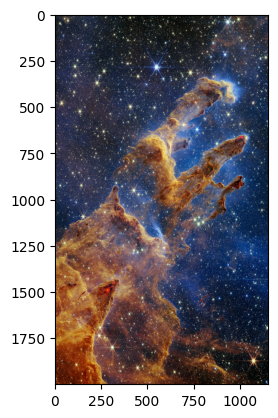

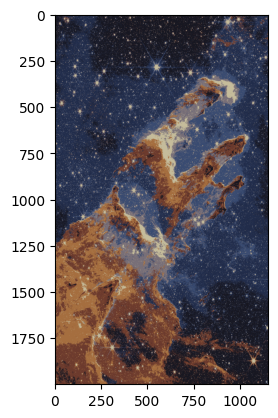

Image saved to Picture/STScI-01GFNN3PWJMY4RQXKZ585BC4QH.pdf


In [26]:
# Call main function
if __name__=="__main__":
    main()